<a href="https://colab.research.google.com/github/Rogendo/Fashion-Mnist-classification/blob/main/Extract_signatures_from_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt


In [2]:
from skimage import measure, morphology
from skimage.color import label2rgb
from skimage.measure import regionprops
import numpy as np

In [3]:
# the parameters are used to remove small size connected pixels outliar 
constant_parameter_1 = 84
constant_parameter_2 = 250
constant_parameter_3 = 100



In [4]:
# the parameter is used to remove big size connected pixels outliar
constant_parameter_4 = 18



In [7]:
img = cv2.imread('fig1.jpg', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary



In [8]:
print(img)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


<ipython-input-9-c282bd66c6cd>:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_label_overlay = label2rgb(blobs_labels, image=img)


the_biggest_component: 2160
average: 34.27485380116959


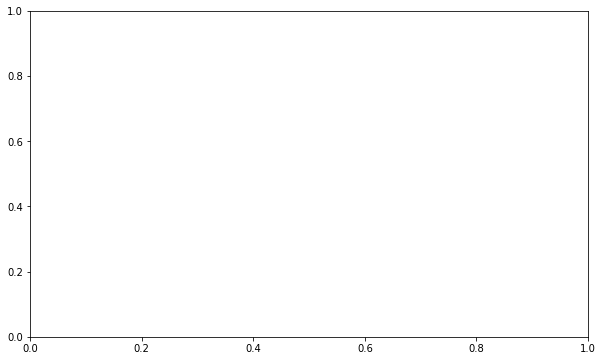

In [9]:
# connected component analysis by scikit-learn framework
blobs = img > img.mean()
blobs_labels = measure.label(blobs, background=1)
image_label_overlay = label2rgb(blobs_labels, image=img)

fig, ax = plt.subplots(figsize=(10, 6))

'''
# plot the connected components (for debugging)
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()
'''

the_biggest_component = 0
total_area = 0
counter = 0
average = 0.0
for region in regionprops(blobs_labels):
    if (region.area > 10):
        total_area = total_area + region.area
        counter = counter + 1
    # print region.area # (for debugging)
    # take regions with large enough areas
    if (region.area >= 250):
        if (region.area > the_biggest_component):
            the_biggest_component = region.area

average = (total_area/counter)
print("the_biggest_component: " + str(the_biggest_component))
print("average: " + str(average))

In [10]:
# experimental-based ratio calculation, modify it for your cases
# a4_small_size_outliar_constant is used as a threshold value to remove connected outliar connected pixels
# are smaller than a4_small_size_outliar_constant for A4 size scanned documents
a4_small_size_outliar_constant = ((average/constant_parameter_1)*constant_parameter_2)+constant_parameter_3
print("a4_small_size_outliar_constant: " + str(a4_small_size_outliar_constant))



a4_small_size_outliar_constant: 202.00849345586187


In [11]:
# experimental-based ratio calculation, modify it for your cases
# a4_big_size_outliar_constant is used as a threshold value to remove outliar connected pixels
# are bigger than a4_big_size_outliar_constant for A4 size scanned documents
a4_big_size_outliar_constant = a4_small_size_outliar_constant*constant_parameter_4
print("a4_big_size_outliar_constant: " + str(a4_big_size_outliar_constant))



a4_big_size_outliar_constant: 3636.1528822055134


In [12]:
# remove the connected pixels are smaller than a4_small_size_outliar_constant
pre_version = morphology.remove_small_objects(blobs_labels, a4_small_size_outliar_constant)


In [13]:
# remove the connected pixels are bigger than threshold a4_big_size_outliar_constant 
# to get rid of undesired connected pixels such as table headers and etc.
component_sizes = np.bincount(pre_version.ravel())
too_small = component_sizes > (a4_big_size_outliar_constant)
too_small_mask = too_small[pre_version]
pre_version[too_small_mask] = 0


In [14]:
# save the the pre-version which is the image is labelled with colors
# as considering connected components
plt.imsave('pre_version.png', pre_version)



In [15]:
# read the pre-version
img = cv2.imread('pre_version.png', 0)


In [16]:
import matplotlib.pyplot as plt

In [17]:
print(img)

[[ 30  30  30 ...  30  30  30]
 [ 30  30  30 ...  30  30  30]
 [ 30  30  30 ...  30  30  30]
 ...
 [215 215 215 ... 215 215 215]
 [215 215 215 ... 215 215 215]
 [215 215 215 ... 215 215 215]]


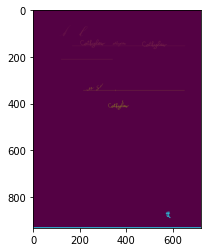

In [18]:
form = cv2.imread('pre_version.png')
plt.imshow(form)
plt.show()

In [23]:
# ensure binary
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]


In [25]:
# save the the result
cv2.imwrite("output.png", img)


True

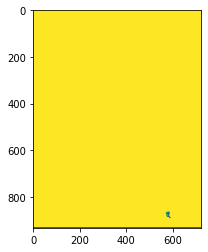

In [26]:
plt.imshow(img)
plt.show()